In [12]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('cardekho_data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [15]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [16]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [17]:
df['Owner'].unique()

array([0, 1, 3])

In [18]:
df = df.fillna(df.mode().iloc[0])

In [19]:
df = df.drop(columns=['Car_Name'])
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [20]:
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol':0 , 'Diesel':1,'CNG':2})
df['Seller_Type'] = df['Seller_Type'].replace({'Dealer':0,'Individual':1})
df['Transmission'] = df['Transmission'].replace({'Manual':0 , 'Automatic':1})
df

C:\Users\Devve\AppData\Local\Temp\ipykernel_12200\3786521649.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol':0 , 'Diesel':1,'CNG':2})
C:\Users\Devve\AppData\Local\Temp\ipykernel_12200\3786521649.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Seller_Type'] = df['Seller_Type'].replace({'Dealer':0,'Individual':1})
C:\Users\Devve\AppData\Local\Temp\ipykernel_12200\3786521649.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


In [21]:
X = df[['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
y = df['Selling_Price']

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [23]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mse

np.float64(1.216567213114754)

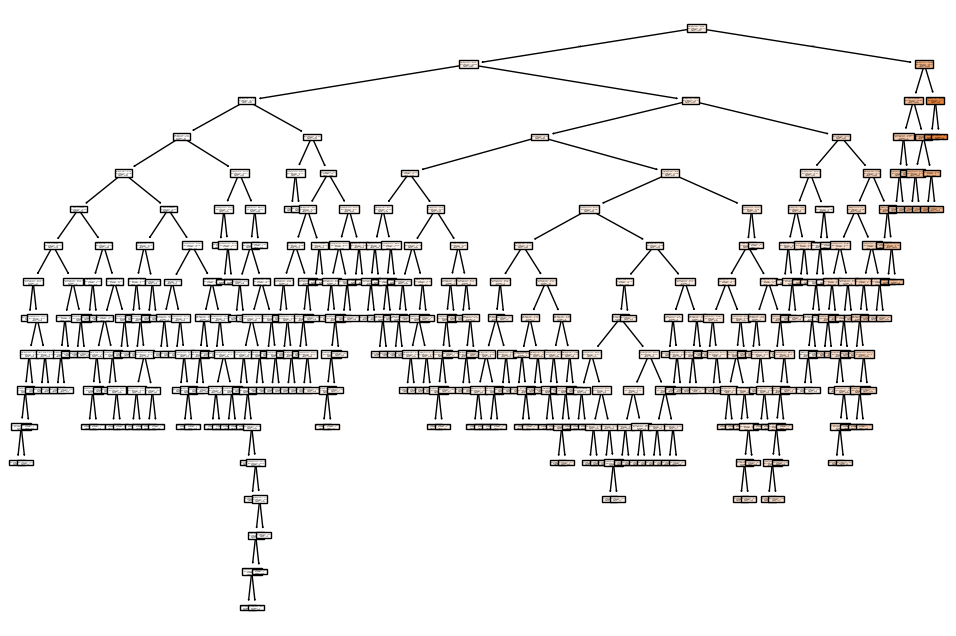

In [24]:
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled = True,feature_names=df.columns.to_list())
plt.show()

In [27]:

new_data = pd.DataFrame({'Year' :[2024],
                         'Present_Price': [17],
                         'Kms_Driven' : [2000],
                         'Fuel_Type' :[1],
                         'Seller_Type' :[0],
                         'Transmission' :[1],
                         'Owner' :[0]})

In [28]:
new_pred = model.predict(new_data)
new_pred

array([14.73])